DATA LOADING

In [ ]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("climate_change_dataset.csv")
df.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [ ]:
# Displays information about the dataset (number of rows, columns, data type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


In [ ]:
df.dtypes

,0
Year,int64
Country,object
Avg Temperature (°C),float64
CO2 Emissions (Tons/Capita),float64
Sea Level Rise (mm),float64
Rainfall (mm),int64
Population,int64
Renewable Energy (%),float64
Extreme Weather Events,int64
Forest Area (%),float64


In [ ]:
# Displays descriptive statistics of a dataset
df.describe()

,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2011.432000,19.883100,10.425800,3.009600,1738.761000,7.053830e+08,27.300500,7.291000,40.572000
std,7.147199,8.542897,5.614665,1.146081,708.976616,4.093910e+08,12.970808,4.422655,17.398998
min,2000.000000,5.000000,0.500000,1.000000,501.000000,3.660891e+06,5.100000,0.000000,10.100000
25%,2005.000000,12.175000,5.575000,2.000000,1098.750000,3.436242e+08,16.100000,3.000000,25.600000
50%,2012.000000,20.100000,10.700000,3.000000,1726.000000,7.131166e+08,27.150000,8.000000,41.150000
75%,2018.000000,27.225000,15.400000,4.000000,2362.500000,1.073868e+09,38.925000,11.000000,55.800000
max,2023.000000,34.900000,20.000000,5.000000,2999.000000,1.397016e+09,50.000000,14.000000,70.000000


In [ ]:
# Displays the columns in the dataset
print(df.columns)

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)'],
      dtype='object')


DATA CLEANING

In [ ]:
# Change column name by removing units
df.columns = df.columns.str.replace(r' \(.+\)', '', regex=True)
df.rename(columns={'Extreme Weather Events': 'Extreme Events', 'Sea Level Rise': 'Sea Rise'}, inplace=True)  # Mengubah nama kolom

# Check column names after changing
print(df.columns)

Index(['Year', 'Country', 'Avg Temperature', 'CO2 Emissions', 'Sea Rise',
       'Rainfall', 'Population', 'Renewable Energy', 'Extreme Events',
       'Forest Area'],
      dtype='object')


In [ ]:
# Check if there are any missing values ​​in the entire dataset
missing_values = df.isnull().sum()

# Display the number of missing values ​​per column
print(missing_values)

Year                0
Country             0
Avg Temperature     0
CO2 Emissions       0
Sea Rise            0
Rainfall            0
Population          0
Renewable Energy    0
Extreme Events      0
Forest Area         0
dtype: int64


In [ ]:
# Check if there are 0 values ​​in the entire dataset
zero_values = (df == 0).sum()

# Displays the number of 0 values ​​per column
print(zero_values)

Year                 0
Country              0
Avg Temperature      0
CO2 Emissions        0
Sea Rise             0
Rainfall             0
Population           0
Renewable Energy     0
Extreme Events      74
Forest Area          0
dtype: int64


In [ ]:
# Change the data type of a particular column if necessary
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year  # Change the Year column to datetime type

print(df.info())

print(df[['Year']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              1000 non-null   int32  
 1   Country           1000 non-null   object 
 2   Avg Temperature   1000 non-null   float64
 3   CO2 Emissions     1000 non-null   float64
 4   Sea Rise          1000 non-null   float64
 5   Rainfall          1000 non-null   int64  
 6   Population        1000 non-null   int64  
 7   Renewable Energy  1000 non-null   float64
 8   Extreme Events    1000 non-null   int64  
 9   Forest Area       1000 non-null   float64
dtypes: float64(5), int32(1), int64(3), object(1)
memory usage: 74.3+ KB
None
   Year
0  2006
1  2019
2  2014
3  2010
4  2007


In [ ]:
# save the cleaned data to csv to create a dashboard later
df.to_csv('cleaned_climate_change.csv', index=False)

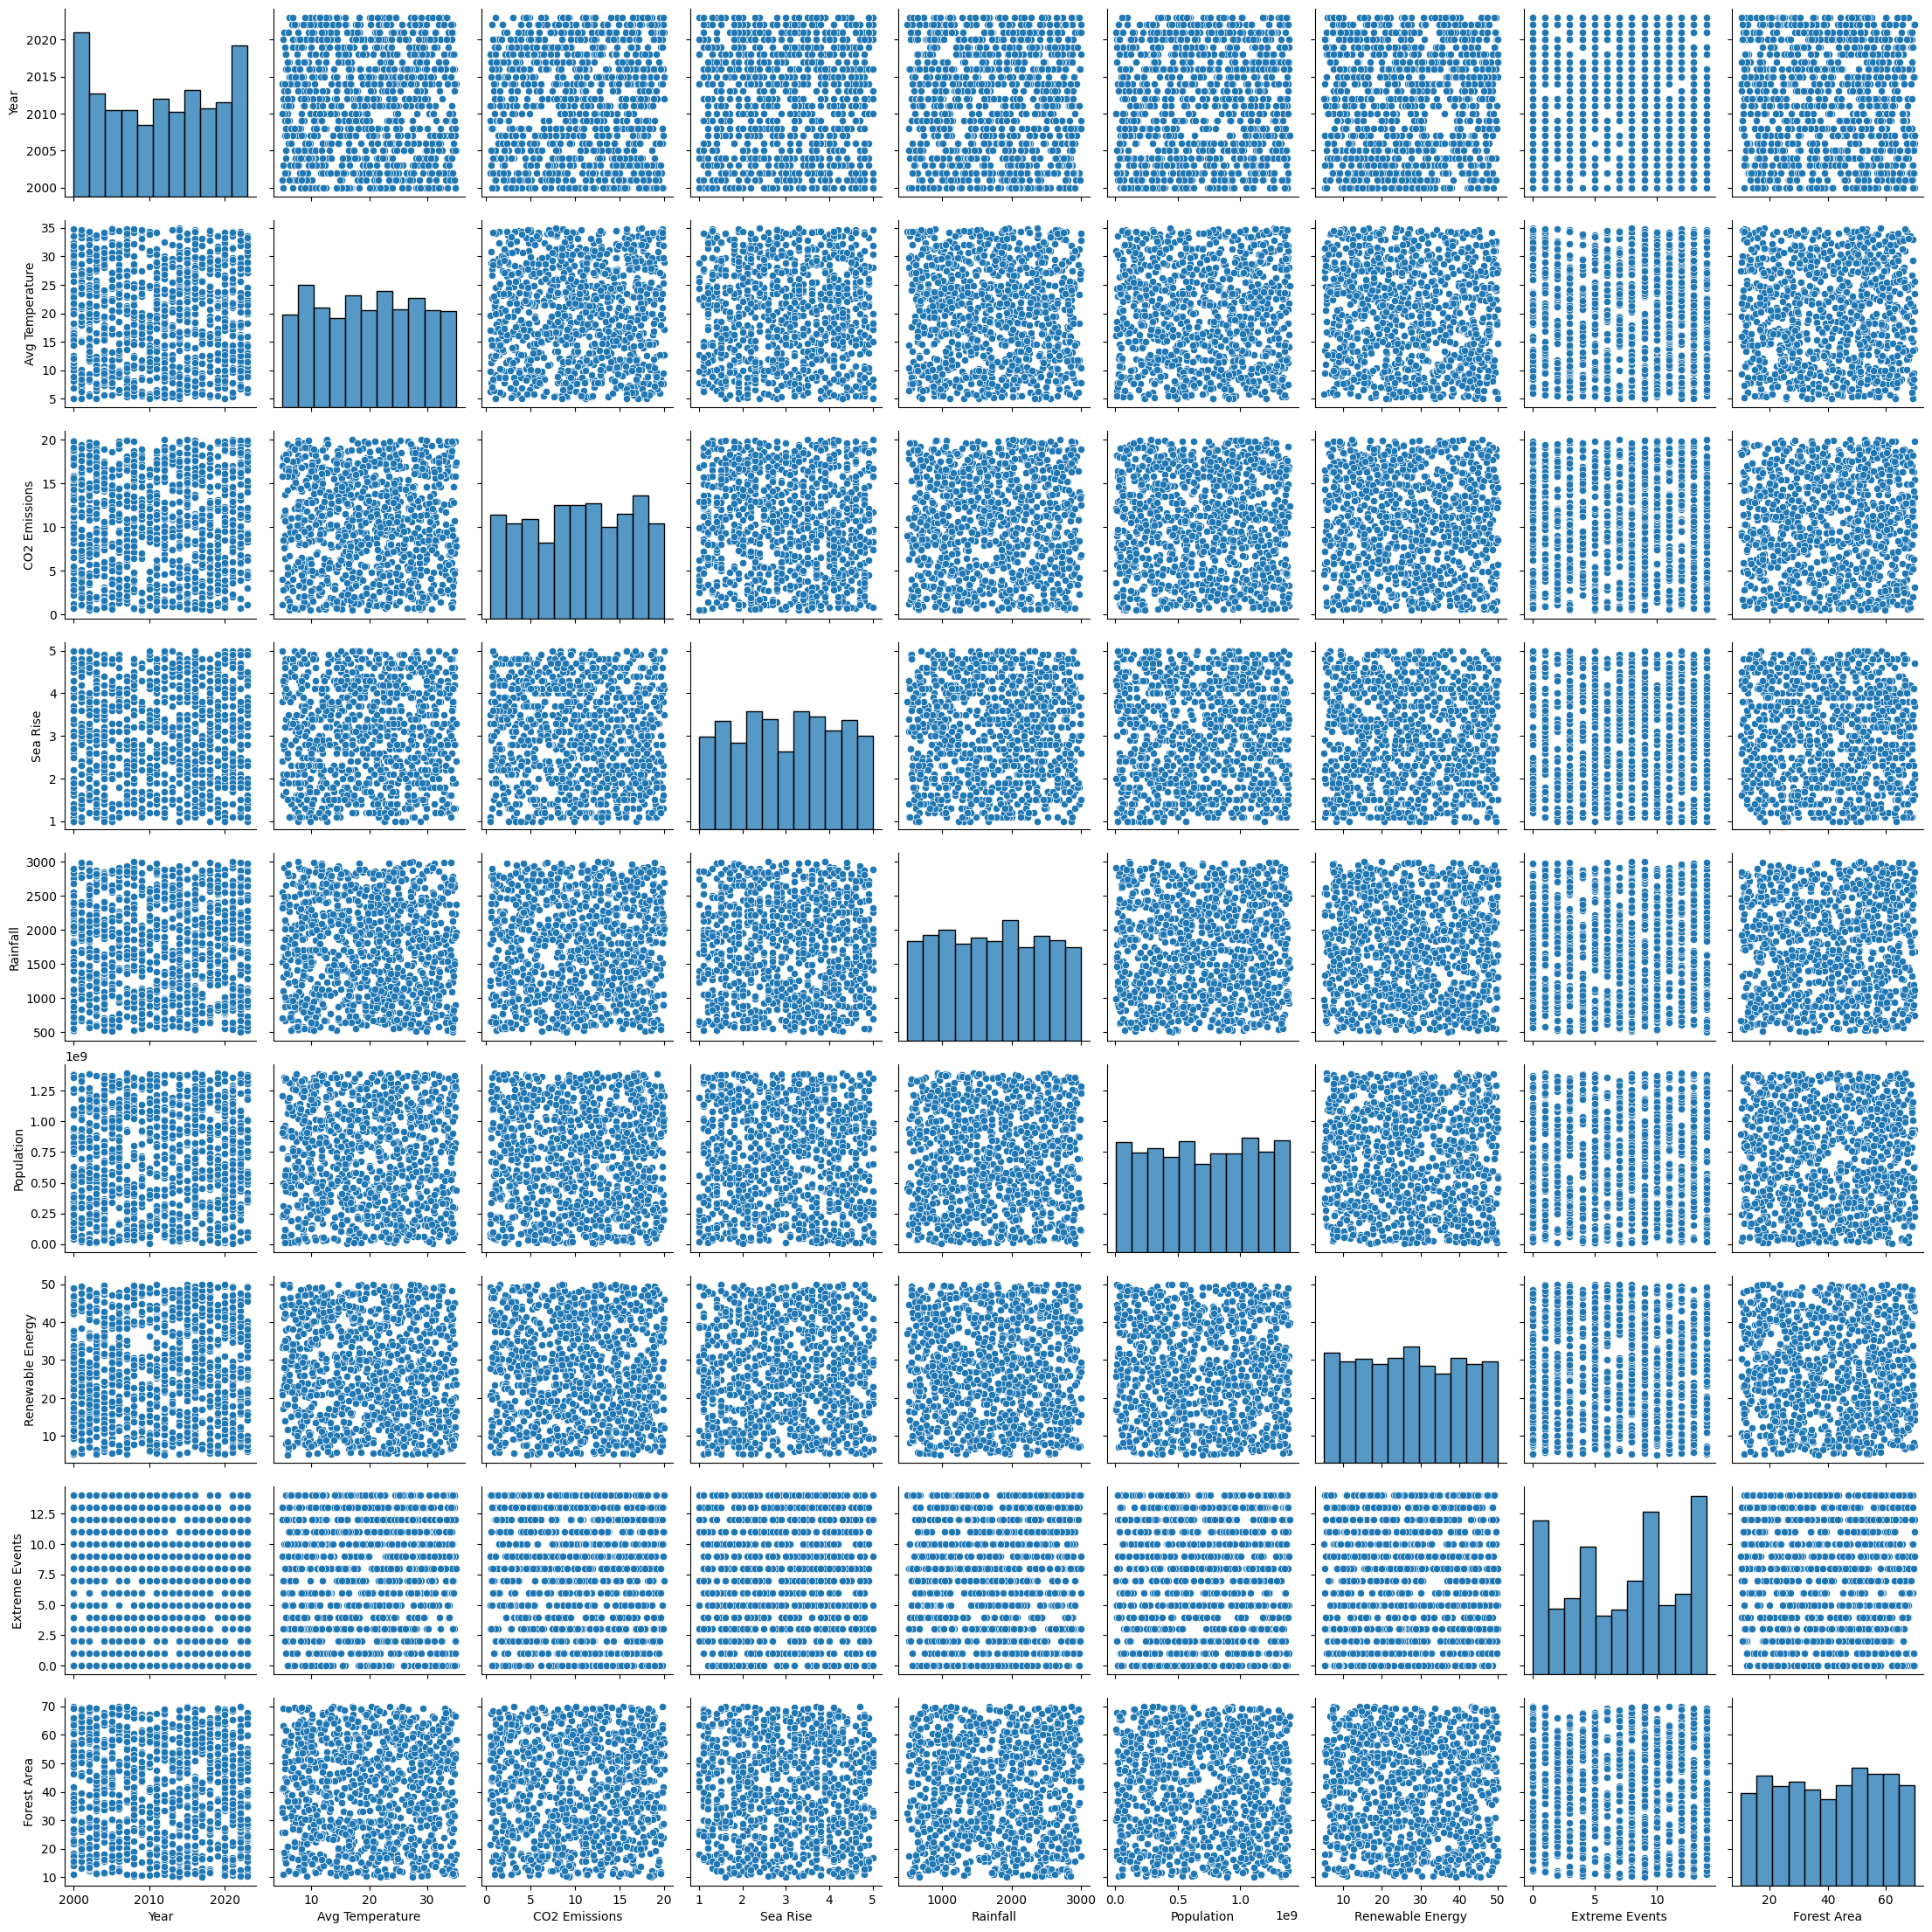

In [ ]:
# Pair plot
numeric_df = df.select_dtypes(include=[np.number])
sns.pairplot(numeric_df)
plt.show()

                      Year  Avg Temperature  CO2 Emissions  Sea Rise  \
Year              1.000000         0.020954       0.041018  0.035433   
Avg Temperature   0.020954         1.000000       0.012323  0.059005   
CO2 Emissions     0.041018         0.012323       1.000000 -0.038815   
Sea Rise          0.035433         0.059005      -0.038815  1.000000   
Rainfall         -0.013638        -0.004532       0.013306  0.022104   
Population        0.071744         0.003550       0.011529 -0.000277   
Renewable Energy  0.023826        -0.065472      -0.023355  0.003655   
Extreme Events   -0.021620         0.034951      -0.004019  0.025003   
Forest Area      -0.041327        -0.017027       0.031387 -0.028670   

                  Rainfall  Population  Renewable Energy  Extreme Events  \
Year             -0.013638    0.071744          0.023826       -0.021620   
Avg Temperature  -0.004532    0.003550         -0.065472        0.034951   
CO2 Emissions     0.013306    0.011529         -0.0

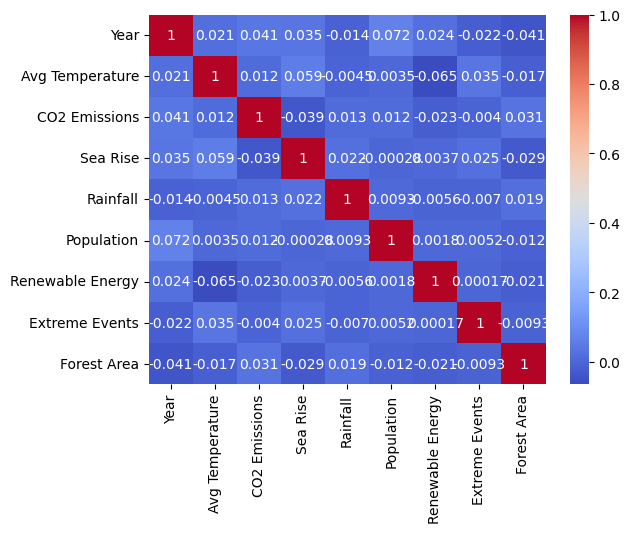

In [ ]:
# Calculate and display the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Visualize it
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


Explain:

**Possible Dependent Variables**

These should be the focus of your analysis. Based on the dataset:

Avg Temperature (°C): If you want to study factors affecting climate, this is a strong candidate.

CO2 Emissions (Tons/Capita): If you want to analyze environmental impact.

Sea Level Rise (mm): If your focus is on climate change effects.

**Independent Variables**

From the pair plot:

Look for strong trends (linear or otherwise) between variables. For example:

Avg Temperature (°C) might be influenced by:
CO2 Emissions (Tons/Capita)
Population
Renewable Energy (%)
Rainfall (mm)
CO2 Emissions (Tons/Capita) might depend on:
Population
Forest Area (%)
Renewable Energy (%)

Variables that show no trend or randomness (e.g., unrelated scatter) can be excluded as independent variables.

ANALYSIS AND CALCULATION

In [ ]:
#import the modules needed for analysis, visualization, and calculation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats

In [ ]:
df.head()

,Year,Country,Avg Temperature,CO2 Emissions,Sea Rise,Rainfall,Population,Renewable Energy,Extreme Events,Forest Area
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


FITTING A MODEL

In [ ]:
#define dependent and covariate/feature
features = ['Year', 'Country', 'Avg Temperature', 'CO2 Emissions', 'Sea Rise',
            'Rainfall', 'Population', 'Renewable Energy', 'Extreme Events', 'Forest Area']
Y =  df["Avg Temperature"]  #dependent variable
X =  df[features] #covariate/feature


#add constant as a covariate
X = sm.add_constant(X)
X

,const,Year,Country,Avg Temperature,CO2 Emissions,Sea Rise,Rainfall,Population,Renewable Energy,Extreme Events,Forest Area
0,1.0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,1.0,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,1.0,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,1.0,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,1.0,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4
...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,2019,India,23.6,8.0,1.2,1365,1358019778,10.0,8,20.2
996,1.0,2000,UK,21.8,10.0,2.2,1273,876123161,14.9,14,30.1
997,1.0,2019,Argentina,23.8,8.9,4.7,891,1120533308,25.9,10,46.5
998,1.0,2016,Australia,21.0,14.9,3.1,1136,380662109,24.5,3,44.5


In [ ]:
# Fit a linear regression model
model = sm.OLS(Y, X.drop(columns=['Country'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Avg Temperature   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.554e+21
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        08:24:24   Log-Likelihood:                 18484.
No. Observations:                1000   AIC:                        -3.695e+04
Df Residuals:                     990   BIC:                        -3.690e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.558e-13   2.04e-08  

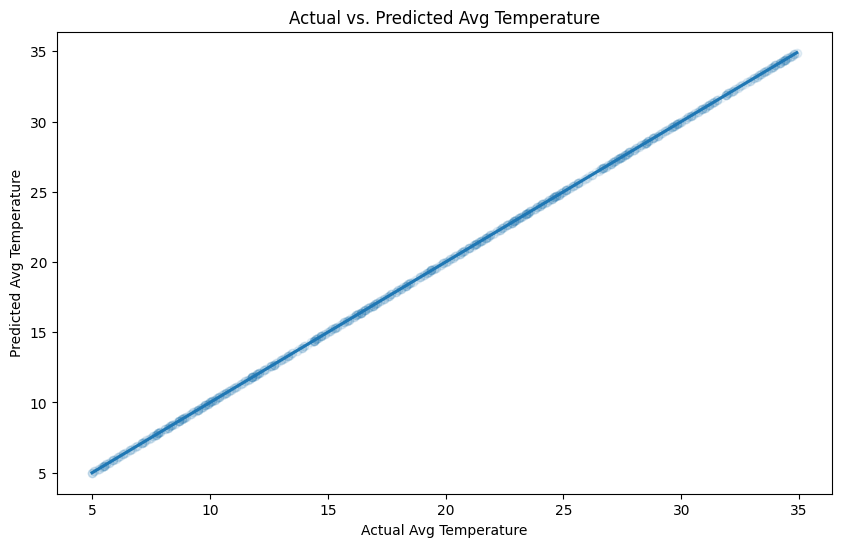

In [ ]:
# Get predicted values
predictions = model.predict(X.drop(columns=['Country']))

# Plotting
plt.figure(figsize=(10, 6))
sns.regplot(x=Y, y=predictions, scatter_kws={'alpha':0.05})  # Use regplot for regression line
plt.xlabel("Actual Avg Temperature")
plt.ylabel("Predicted Avg Temperature")
plt.title("Actual vs. Predicted Avg Temperature")
plt.show()

Question: How is the distribution of CO2 emissions per capita?

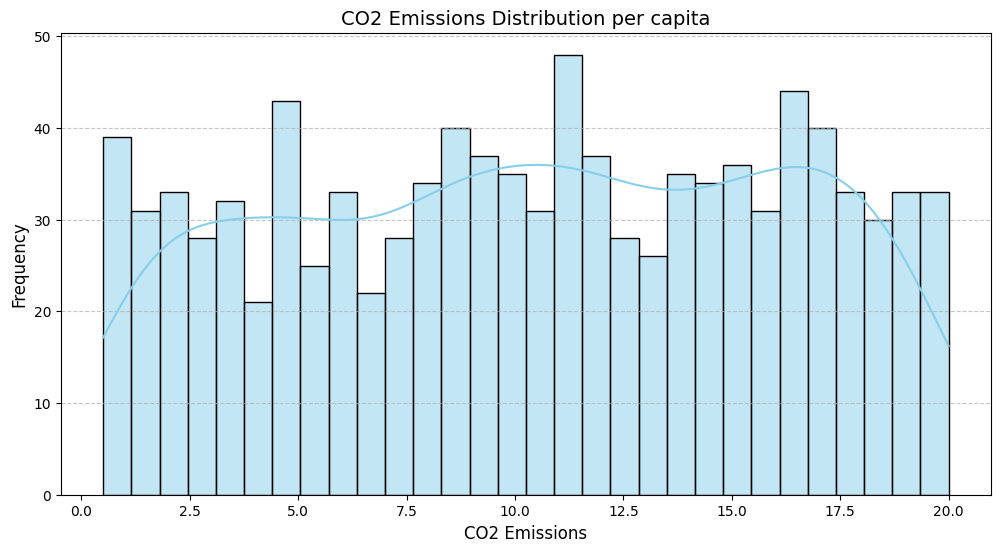

In [ ]:
# CO2 emission distribution analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='CO2 Emissions', bins=30, kde=True, color='skyblue')
plt.title('CO2 Emissions Distribution per capita', fontsize=14)
plt.xlabel('CO2 Emissions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Question: Based on current trends, what is the projection of global CO2 emissions changes in the next 10 years with at least 85% accuracy?

In [ ]:
import statsmodels.api as sm

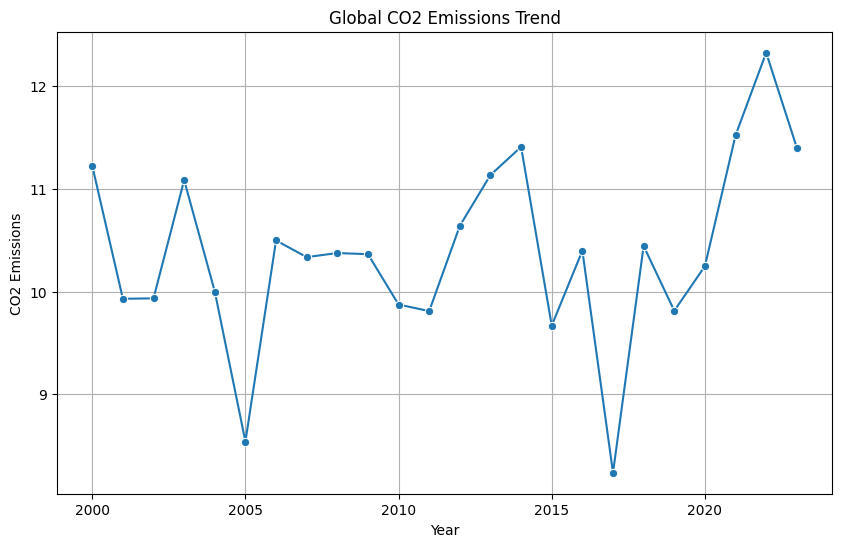

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.420
Date:                Thu, 23 Jan 2025   Prob (F-statistic):              0.246
Time:                        14:56:18   Log-Likelihood:                -30.527
No. Observations:                  24   AIC:                             65.05
Df Residuals:                      22   BIC:                             67.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.3565     53.485     -0.998      0.3

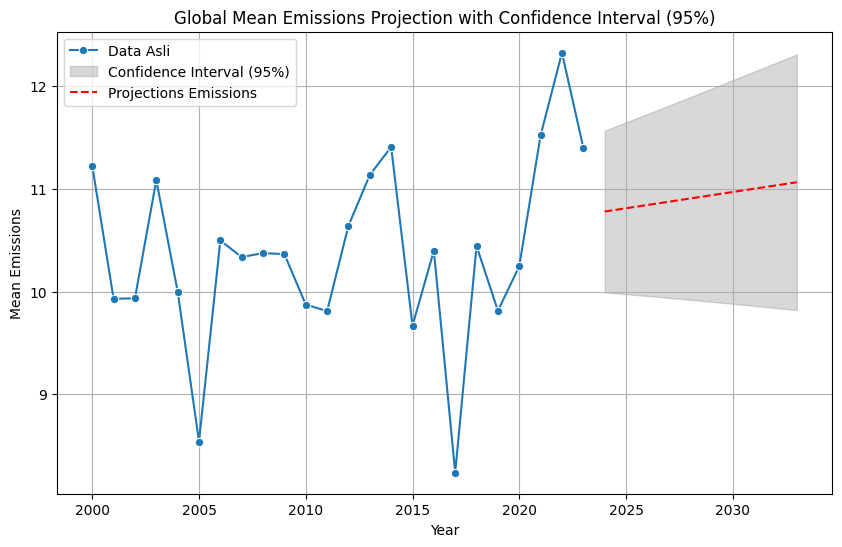

Mean Absolute Error (MAE) on training data: 0.64
Model Accuracy: 93.81%
The model has reached a minimum accuracy of 85%


In [ ]:
# Calculate the average global emissions per year
global_co2_ems = df.groupby('Year')['CO2 Emissions'].mean().reset_index()

# Visualize the emissions trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='CO2 Emissions', data=global_co2_ems, marker='o')
plt.title('Global CO2 Emissions Trend')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.grid(True)
plt.show()

# Linear Regression for global emissions projection
X = global_co2_ems['Year'].values.reshape(-1, 1)  # Year as independent variable
y = global_co2_ems['CO2 Emissions'].values  # CO2 Emisisons as dependent variable

# Adding a constant for the intercept (linear model)
X = sm.add_constant(X)

# Building a regression model
model = sm.OLS(y, X).fit()

# Displaying the model summary
print(model.summary())

# Emissions projections for the next 10 years (current year + 10 years)
future_years = np.array([global_co2_ems['Year'].max() + i for i in range(1, 11)]).reshape(-1, 1)
future_years_with_const = sm.add_constant(future_years)
future_ems_predictions = model.predict(future_years_with_const)
# Displaying emissions projections
for year, temp in zip(future_years.flatten(), future_ems_predictions):
    print(f"Emissions projections for year {year}: {temp:.2f}")

# Calculates Confidence Interval (CI) for projections
predictions_with_ci = model.get_prediction(future_years_with_const)
ci_lower, ci_upper = predictions_with_ci.conf_int(alpha=0.05).T

# Visualization of emissions projections with CI
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='CO2 Emissions', data=global_co2_ems, marker='o', label='Data Asli')
plt.fill_between(future_years.flatten(), ci_lower, ci_upper, color='gray', alpha=0.3, label='Confidence Interval (95%)')
plt.plot(future_years, future_ems_predictions, label='Projections Emissions', color='red', linestyle='--')
plt.title('Global Mean Emissions Projection with Confidence Interval (95%)')
plt.xlabel('Year')
plt.ylabel('Mean Emissions')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation using MAE (Mean Absolute Error)
mae = np.mean(np.abs(y - model.predict(X)))
print(f"Mean Absolute Error (MAE) on training data: {mae:.2f}")

# Check model accuracy
accuracy = 100 - (mae / np.mean(y) * 100)
print(f"Model Accuracy: {accuracy:.2f}%")

# Projection accuracy of at least 85% based on MAE
if accuracy >= 85:
    print("The model has reached a minimum accuracy of 85%")
else:
    print("The model has not reached a minimum accuracy of 85%")